# Determining Deflection in a beam using Castigliano's Theorem 

Castigliano's Theorem, or the theorem of least work is an extremely useful theorem which can be put to good use to find either vertical or horizontal deflections in beams. In this project, we make use of Castigliano's Second Theorem which applies only for structures made of linear elastic materials.  

## Let us import a reference diagram for the problem we are going to solve.

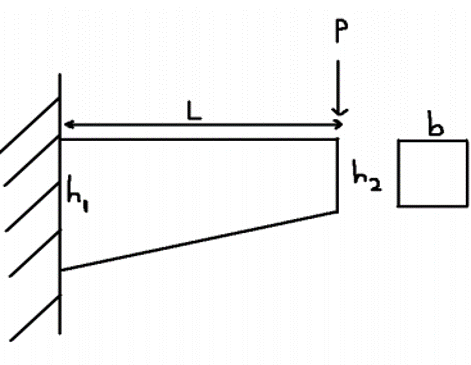

In [1]:
from IPython.display import Image
Image("D:\Picture1.png")

Here, we will consider a beam of varying cross section. The height of the beam at the base is h1 whereas on the opposite end it is h2. The length of the beam is taken to be L. A point load P is applied at the end of the beam. Let the Young's Modulus of elasticity for the beam be E GPa. Our task is to find the displacement at the tip of the beam where the force is applied.

Castigliano's Second Theorem =

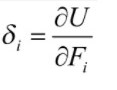

In [2]:
Image("D:\pico.jpg", width = 90)

For the problem we are solving, F = P

We know that Strain energy (U) for bending is as follows-

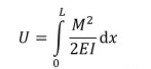

In [3]:
Image("D:\SharedScreenshot.jpg")

Here, I is the Moment of Inertia of the beam and E is the Young's Modulus

Now, to find Delta, we need to find U. To find U, we need to know M and I. 
By observation, M at the wall (x=0) will be maximum i.e PL and at the end of the beam it will be 0.

Therefore, we can write:       M = Px-PL

To find I, we need the height as a function of x. Thus, 

h= (h2-h1)x/L + h1

Finally, I = (bh^3)/12 where h will be as above. It will be a function of x.

#### Let us now code these equations -

In [4]:
from sympy import *

In [5]:
x= Symbol('x')
Po= Symbol('Po')

#### Enter the values of the following variables in S.I units for which you wish to calculate the value of delta in the cell below. Here we will take some values to show how it is done.

In [6]:
P = 50000                                                         #enter the value of load in Newton 
L = 5                                                             #enter the value of Length of the beam in m
h2 = 2                                                            #enter the value of the final height in m 
h1 = 4                                                            #enter the value of the initial height in m
b = 3                                                             #enter the value of the base length in m 
E = 1.2e+11                                                       #enter the value of Young's modulus in Pascal(Pa)

In [7]:
# Here we take a variable Po which is actually our load P to simplify the process of calculation of partial derivative 
# and hence its integral

M = Po*x - Po*L                                                   #Moment as calculated above
h = (h2-h1)*x/L + h1                                              #Height at any given x as calculated above
I = (b*h**3)/12                                                   #Moment of Inertia of the beam at any given x
U = (M**2)/(2*E*I)                                                #Strain Energy 
delta_pr = U.diff(Po) 
delta_dash = integrate(delta_pr, (x,0,L))
delta =lambdify(Po,delta_dash)

The code above does all the complex calculations. Since we had to take partial derivative with respect to the load P, entering the value of the load P before hand wouldn't work. Thus now, we output our final answer by finally substituting the value of our load P using the lambdify function. 

In [8]:
print(delta(P))

(1.7746661604150658e-06+0j)


#### Thus, we have found out the displacement at the tip of the beam where the force is applied. 
                                    
                                    Delta = 1.77 x 10^(-6) 
                                    Delta = 1.77 Micrometer

### Hence, this code serves as a powerful tool to easily calculate the deflection of the tip of the varying beam in the vertical direction for any given values of P, L, E, b, h2 and h1 by simply entering all these unknowns in the input cell above!